In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import datetime as dt
from numpy import mean, absolute
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [2]:
data= pd.read_csv('TSLA.csv')
data['Date']= pd.to_datetime(data['Date'])
data.rename(columns={'Adj Close':'Adj_Close'}, inplace= True)
data.head()


,Date,Open,High,Low,Close,Adj_Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# SIMPLE MOVING AVERAGE

In [3]:
def error_cal_SMA(Actual_Values,Predicted_values):
    print("\nMean Absolute Deviation Error (MAD)")
    MAD_Open = mean(absolute(Actual_Values['Open'] - Predicted_values['Open_SA']))    
    MAD_Close = mean(absolute(Actual_Values['Close'] - Predicted_values['Close_SA']))
    MAD_High = mean(absolute(Actual_Values['High'] - Predicted_values['High_SA']))
    MAD_Low = mean(absolute(Actual_Values['Low'] - Predicted_values['Low_SA']))
    MAD_Volume = mean(absolute(Actual_Values['Volume'] - Predicted_values['Volume_SA']))
    MAD_Aclose = mean(absolute(Actual_Values['Adj_Close'] - Predicted_values['A_Close_SA']))
    print("Opening Price",MAD_Open,"\nClosing Price",MAD_Close,"\nHighest Price",MAD_High,"\nLowest Price",MAD_Low,"\nVolume",MAD_Volume,"\nAdj Close", MAD_Aclose)
    
    print("\nMean Square Error (MSE)")
    MSE_Open = mean((Actual_Values['Open'] - Predicted_values['Open_SA'])**2)
    MSE_Close = mean((Actual_Values['Close'] - Predicted_values['Close_SA'])**2)
    MSE_High = mean((Actual_Values['High'] - Predicted_values['High_SA'])**2)
    MSE_Low = mean((Actual_Values['Low'] - Predicted_values['Low_SA'])**2)
    MSE_Volume = mean((Actual_Values['Volume'] - Predicted_values['Volume_SA'])**2)
    MSE_Aclose = mean((Actual_Values['Adj_Close'] - Predicted_values['A_Close_SA'])**2)
    print("Opening Price",MSE_Open,"\nClosing Price",MSE_Close,"\nHighest Price",MSE_High,"\nLowest Price",MSE_Low,"\nVolume",MSE_Volume, "\nAdj Close", MSE_Aclose)
    
    print("\nMean Average Percentage Error (MAPE)")
    MAPE_Open=mean(absolute(Actual_Values['Open'] - Predicted_values['Open_SA'])/data['Open']) * 100
    MAPE_Close=mean(absolute(Actual_Values['Close'] - Predicted_values['Close_SA'])/data['Close']) * 100
    MAPE_High=mean(absolute(Actual_Values['High'] - Predicted_values['High_SA'])/data['High']) * 100
    MAPE_Low=mean(absolute(Actual_Values['Low'] - Predicted_values['Low_SA'])/data['Low']) * 100
    MAPE_Volume=mean(absolute(Actual_Values['Volume'] - Predicted_values['Volume_SA'])/data['Volume']) * 100
    MAPE_Aclose=mean(absolute(Actual_Values['Adj_Close'] - Predicted_values['A_Close_SA'])/data['Adj_Close']) * 100
    print("Opening Price",MAPE_Open,"\nClosing Price",MAPE_Close,"\nHighest Price",MAPE_High,"\nLowest Price",MAPE_Low,"\nVolume",MAPE_Volume,"\nAdj Close",MAPE_Aclose)

In [4]:
def simple_average(data,k):
     
    data['Open_SA'] = data['Open'].rolling(window=k).mean()
    data['Close_SA'] = data['Close'].rolling(window=k).mean()
    data['High_SA'] = data['High'].rolling(window=k).mean()
    data['Low_SA'] = data['Low'].rolling(window=k).mean()
    data['Volume_SA'] = data['Volume'].rolling(window=k).mean()
    data['A_Close_SA'] = data['Adj_Close'].rolling(window=k).mean()
   
    train = data[(data.Date < 'Feb 27 2017') & (data.Date >= 'Jan 01 2017')] 
    valid = data[(data.Date <= 'Mar 03 2017') & (data.Date >= 'Feb 27 2017')] 

    #Error metrics
    Actual_Values = data[(data.Date >= 'Feb 27 2017') & (data.Date <= 'Mar 03 2017')] 
    Predicted_Values = valid[(data.Date >= 'Feb 27 2017') & (data.Date <= 'Mar 03 2017')] 
    error_cal_SMA(Actual_Values,Predicted_Values)

In [5]:
simple_average(data,2)
simple_average(data,3)
simple_average(data,4)


Mean Absolute Deviation Error (MAD)
Opening Price 2.395997700000032 
Closing Price 1.6110015000005773 
Highest Price 1.933001599999966 
Lowest Price 1.6860000999999785 
Volume 1183060.0 
Adj Close 1.6110015000005773

Mean Square Error (MSE)
Opening Price 7.842105647016763 
Closing Price 6.5765635200131 
Highest Price 6.198677846005429 
Lowest Price 4.95154455200389 
Volume 2185675047000.0 
Adj Close 6.5765635200131

Mean Average Percentage Error (MAPE)
Opening Price 0.9570259115015411 
Closing Price 0.6506950948656766 
Highest Price 0.7712318167369516 
Lowest Price 0.688202547412523 
Volume 20.19367817744685 
Adj Close 0.6506950948656766

Mean Absolute Deviation Error (MAD)
Opening Price 3.482000066666717 
Closing Price 2.0793335333334197 
Highest Price 3.0786682000001577 
Lowest Price 2.840668666666647 
Volume 1471186.6666666665 
Adj Close 2.0793335333334197

Mean Square Error (MSE)
Opening Price 18.46256264490548 
Closing Price 10.100187508463545 
Highest Price 18.518606162679678 
L

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [6]:
forecast_SA = data[(data.Date <= 'Mar 03 2017') & (data.Date >= 'Feb 27 2017')]
forecast_SA.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Open_SA,Close_SA,High_SA,Low_SA,Volume_SA,A_Close_SA
1677,2017-02-27,248.169998,248.360001,242.009995,246.229996,246.229996,11460800,261.285000,258.182503,263.680004,255.092499,10825650.0,258.182503
1678,2017-02-28,244.190002,251.000000,243.899994,249.990005,249.990005,6078100,252.255001,252.302501,255.567501,247.917496,10156425.0,252.302501
1679,2017-03-01,254.179993,254.850006,249.110001,250.020004,250.020004,4809500,249.799999,250.810001,253.115002,246.304997,7630000.0,250.810001
1680,2017-03-02,249.710007,253.279999,248.270004,250.479996,250.479996,3351800,249.062500,249.180000,251.872501,245.822499,6425050.0,249.180000
1681,2017-03-03,250.740005,251.899994,249.000000,251.570007,251.570007,2919400,249.705002,250.515003,252.757500,247.570000,4289700.0,250.515003


# WEIGHTED MOVING AVERAGE

In [7]:
def error_cal_WMA(Actual_Values,Predicted_values):
    print("\nMean Absolute Deviation Error (MAD)")
    MAD_Open = mean(absolute(Actual_Values['Open'] - Predicted_values['Open_Weighted_MA']))    
    MAD_Close = mean(absolute(Actual_Values['Close'] - Predicted_values['Close_Weighted_MA']))
    MAD_High = mean(absolute(Actual_Values['High'] - Predicted_values['High_Weighted_MA']))
    MAD_Low = mean(absolute(Actual_Values['Low'] - Predicted_values['Low_Weighted_MA']))
    MAD_Volume = mean(absolute(Actual_Values['Volume'] - Predicted_values['Volume_Weighted_MA']))
    MAD_Aclose = mean(absolute(Actual_Values['Adj_Close'] - Predicted_values['A_Close_Weighted_MA']))
    print("Opening Price",MAD_Open,"\nClosing Price",MAD_Close,"\nHighest Price",MAD_High,"\nLowest Price",MAD_Low,"\nVolume",MAD_Volume,"\nAdj Close",MAD_Aclose)
    
    print("\nMean Square Error (MSE)")
    MSE_Open = mean((Actual_Values['Open'] - Predicted_values['Open_Weighted_MA'])**2)
    MSE_Close = mean((Actual_Values['Close'] - Predicted_values['Close_Weighted_MA'])**2)
    MSE_High = mean((Actual_Values['High'] - Predicted_values['High_Weighted_MA'])**2)
    MSE_Low = mean((Actual_Values['Low'] - Predicted_values['Low_Weighted_MA'])**2)
    MSE_Volume = mean((Actual_Values['Volume'] - Predicted_values['Volume_Weighted_MA'])**2)
    MSE_Aclose = mean((Actual_Values['Adj_Close'] - Predicted_values['A_Close_Weighted_MA'])**2)
    print("Opening Price",MSE_Open,"\nClosing Price",MSE_Close,"\nHighest Price",MSE_High,"\nLowest Price",MSE_Low,"\nVolume",MSE_Volume,"\nAdj Close",MSE_Aclose)
    
    print("\nMean Average Percentage Error (MAPE)")
    MAPE_Open=mean(absolute(Actual_Values['Open'] - Predicted_values['Open_Weighted_MA'])/data['Open']) * 100
    MAPE_Close=mean(absolute(Actual_Values['Close'] - Predicted_values['Close_Weighted_MA'])/data['Close']) * 100
    MAPE_High=mean(absolute(Actual_Values['High'] - Predicted_values['High_Weighted_MA'])/data['High']) * 100
    MAPE_Low=mean(absolute(Actual_Values['Low'] - Predicted_values['Low_Weighted_MA'])/data['Low']) * 100
    MAPE_Volume=mean(absolute(Actual_Values['Volume'] - Predicted_values['Volume_Weighted_MA'])/data['Volume']) * 100
    MAPE_Aclose=mean(absolute(Actual_Values['Adj_Close'] - Predicted_values['A_Close_Weighted_MA'])/data['Adj_Close']) * 100
    print("Opening Price",MAPE_Open,"\nClosing Price",MAPE_Close,"\nHighest Price",MAPE_High,"\nLowest Price",MAPE_Low,"\nVolume",MAPE_Volume,"\nAdj Close",MAPE_Aclose)

In [8]:
def weighted_average(data,k,weights):
    if (k != len(weights)):
        print("Error: Value of K is not equal to number of Weights or sum of weights equals 1")
    else:
        df = pd.DataFrame(data)
        #weights = np.array([0.5, 0.25, 0.25])
        sum_weights = np.sum(weights)
    
        data['Open_Weighted_MA'] = (data['Open'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['Close_Weighted_MA'] = (data['Close'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['High_Weighted_MA'] = (data['High'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['Low_Weighted_MA'] = (data['Low'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['Volume_Weighted_MA'] = (data['Volume'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
        
        data['A_Close_Weighted_MA'] = (data['Adj_Close'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
        
        train = data[(data.Date < 'Feb 27 2017') & (data.Date >= 'Jan 01 2017')] 
        valid = data[(data.Date <= 'Mar 03 2017') & (data.Date >= 'Feb 27 2017')] 
        #Error metrics
        Actual_Values = data[(data.Date >= 'Feb 27 2017') & (data.Date <= 'Mar 03 2017')] 
        Predicted_Values = valid[(data.Date >= 'Feb 27 2017') & (data.Date <= 'Mar 03 2017')] 
        error_cal_WMA(Actual_Values,Predicted_Values)

In [9]:
weighted_average(data,3,[0.5,0.25,0.25])
weighted_average(data,3,[0.6,0.3,0.1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



Mean Absolute Deviation Error (MAD)
Opening Price 3.1129967000000023 
Closing Price 1.7950039499999946 
Highest Price 1.8720015000000103 
Lowest Price 1.816000500000007 
Volume 1316065.0 
Adj Close 1.7950039499999946

Mean Square Error (MSE)
Opening Price 13.353941967030991 
Closing Price 8.785398262023739 
Highest Price 7.503571163758613 
Lowest Price 5.964203964753986 
Volume 3028500918875.0 
Adj Close 8.785398262023739

Mean Average Percentage Error (MAPE)
Opening Price 1.246379068839854 
Closing Price 0.7254306985150281 
Highest Price 0.7472772283277117 
Lowest Price 0.7405566390760159 
Volume 20.08483979729335 
Adj Close 0.7254306985150281

Mean Absolute Deviation Error (MAD)
Opening Price 3.161996840000012 
Closing Price 1.9952018599999861 
Highest Price 2.2952018800000076 
Lowest Price 2.0179999199999714 
Volume 1472874.0000000005 
Adj Close 1.9952018599999861

Mean Square Error (MSE)
Opening Price 13.359550106429761 
Closing Price 10.467820608023867 
Highest Price 9.4476389887

In [10]:
forecast_WA = data[(data.Date <= 'Mar 03 2017') & (data.Date >= 'Feb 27 2017')]
forecast_WA.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Open_SA,Close_SA,High_SA,Low_SA,Volume_SA,A_Close_SA,Open_Weighted_MA,Close_Weighted_MA,High_Weighted_MA,Low_Weighted_MA,Volume_Weighted_MA,A_Close_Weighted_MA
1677,2017-02-27,248.169998,248.360001,242.009995,246.229996,246.229996,11460800,261.285000,258.182503,263.680004,255.092499,10825650.0,258.182503,250.466002,253.067999,254.558000,247.112996,8949010.0,253.067999
1678,2017-02-28,244.190002,251.000000,243.899994,249.990005,249.990005,6078100,252.255001,252.302501,255.567501,247.917496,10156425.0,252.302501,247.576999,247.736999,249.801001,243.286995,9180860.0,247.736999
1679,2017-03-01,254.179993,254.850006,249.110001,250.020004,250.020004,4809500,249.799999,250.810001,253.115002,246.304997,7630000.0,250.810001,247.739000,250.048004,252.383002,245.899997,5424890.0,250.048004
1680,2017-03-02,249.710007,253.279999,248.270004,250.479996,250.479996,3351800,249.062500,249.180000,251.872501,245.822499,6425050.0,249.180000,252.494998,250.313002,254.084003,248.847002,4183180.0,250.313002
1681,2017-03-03,250.740005,251.899994,249.000000,251.570007,251.570007,2919400,249.705002,250.515003,252.757500,247.570000,4289700.0,250.515003,249.839006,250.880000,252.707997,248.413002,3222450.0,250.880000


# EXPONENTIAL SMOOTHING

In [11]:
def exponential_smoothing(data,alpha):
    
    for i in data:
        if i in ['Open','High','Low','Close','Volume','Adj_Close']:
            exp = ExponentialSmoothing(data[i]) 
            exp_model = exp.fit(smoothing_level=alpha) 
            data[i + '_Weighted_MA']=exp_model.fittedvalues
      
    train = data[(data.Date < 'Feb 27 2017') & (data.Date >= 'Jan 01 2017')] 
    valid = data[(data.Date <= 'Mar 03 2017') & (data.Date >= 'Feb 27 2017')] 
    
    #Error metrics
    Actual_Values = data[(data.Date >= 'Feb 27 2017') & (data.Date <= 'Mar 03 2017')] 
    Predicted_Values = valid[(data.Date >= 'Feb 27 2017') & (data.Date <= 'Mar 03 2017')] 
      
    error_cal_WMA(Actual_Values,Predicted_Values)

In [12]:
exponential_smoothing(data,0.6)
exponential_smoothing(data,0.5)
exponential_smoothing(data,0.9)                                        
                                         


Mean Absolute Deviation Error (MAD)
Opening Price 5.678543088013396 
Closing Price 3.3694513722932298 
Highest Price 4.659845220936245 
Lowest Price 4.378777032958885 
Volume 2761854.306029483 
Adj Close 1.9952018599999861

Mean Square Error (MSE)
Opening Price 48.816774752679855 
Closing Price 36.19240768674348 
Highest Price 50.35009837333966 
Lowest Price 39.167028519161576 
Volume 8904326834959.51 
Adj Close 10.467820608023867

Mean Average Percentage Error (MAPE)
Opening Price 2.2855359534743656 
Closing Price 1.3634429583799312 
Highest Price 1.8655274979519687 
Lowest Price 1.7942105425654178 
Volume 58.118347808781934 
Adj Close 0.8060933540883689

Mean Absolute Deviation Error (MAD)
Opening Price 6.178561272125751 
Closing Price 4.327350308595783 
Highest Price 5.437398765015229 
Lowest Price 4.84099572735538 
Volume 3008820.2817686265 
Adj Close 1.9952018599999861

Mean Square Error (MSE)
Opening Price 63.847068043438284 
Closing Price 47.66345655617201 
Highest Price 67.859

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [13]:
df=pd.read_csv('TSLA.csv')
tesla = df.copy()
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla = tesla[tesla['Date'] <= dt.datetime(2017,3,7)]
tesla.rename(columns={'Adj Close':'Adj_Close'}, inplace= True)
tesla.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# Durbin-Watson Statistic

In [14]:
print('DW statistic for Opening Price is: ',durbin_watson(tesla['Open']))
print('DW statistic for Closing Price is: ',durbin_watson(tesla['Close']))
print('DW statistic for Highest Price is: ',durbin_watson(tesla['High']))
print('DW statistic for Lowest Price is: ',durbin_watson(tesla['Low']))
print('DW statistic for Trading Volume is: ',durbin_watson(tesla['Volume']))


DW statistic for Opening Price is:  0.0008402831823626482
DW statistic for Closing Price is:  0.0007333546150387083
DW statistic for Highest Price is:  0.0005890708602447673
DW statistic for Lowest Price is:  0.0007372830417820543
DW statistic for Trading Volume is:  0.22038511951315765


# AUTO-REGRESSIVE MODEL

In [15]:
tesla['Open_lag_1'] = tesla['Open'].shift()
tesla['Open_lag_2'] = tesla['Open'].shift(2)
tesla['High_lag_1'] = tesla['High'].shift()
tesla['High_lag_2'] = tesla['High'].shift(2)
tesla['Low_lag_1'] = tesla['Low'].shift()
tesla['Low_lag_2'] = tesla['Low'].shift(2)
tesla['Close_lag_1'] = tesla['Close'].shift()
tesla['Close_lag_2'] = tesla['Close'].shift(2)

In [16]:
tesla.dropna(inplace=True)

In [17]:
def auto_regressive(variable):
    x_lag_1 = variable + '_lag_1'
    x_lag_2 = variable + '_lag_2' 
    #train, test = tesla[1:len(tesla[[x_lag_1,x_lag_2,variable]])-7], tesla[len(tesla[[x_lag_1,x_lag_2]])-7:len(tesla[[x_lag_1,x_lag_2]])-5]
    train = tesla[(tesla['Date'] < dt.datetime(2018,2,27)) & (tesla['Date'] >= dt.datetime(2017,1,1))] 
    test = tesla[(tesla['Date'] <= dt.datetime(2018,3,3)) & (tesla['Date'] >= dt.datetime(2017,2,27))] 
    
    #x = train([[x_lag_1,x_lag_2]],axis=1)
    #y = train[variable]
    lin_model = LinearRegression()
    lin_model.fit(train[[x_lag_1,x_lag_2]], train[variable])
    print('Coefficient of 1st lagged column of',variable,'is: ',lin_model.coef_[0])
    print('Coefficient of 2nd lagged column of',variable,'is: ',lin_model.coef_[1])
    print('MSE for lag 1 of',variable,'is: ',mean_squared_error(test[variable],lin_model.coef_[0]*test[x_lag_1]))
    print('MSE for lag 2 of',variable,'is: ',mean_squared_error(test[variable],lin_model.coef_[1]*test[x_lag_2]))
    
    plt.figure(figsize=(10,4))
    plt.title('1st order lag')
    plt.plot(test[variable],color='blue')
    plt.plot(lin_model.coef_[0]*test[x_lag_1],color='red')
    
    plt.figure(figsize=(10,4))
    plt.title('2nd order lag')
    plt.plot(test[variable],color='green')
    plt.plot(lin_model.coef_[1]*test[x_lag_2],color='black')

Coefficient of 1st lagged column of Open is:  0.9121000361893817
Coefficient of 2nd lagged column of Open is:  -0.012667506015218481
MSE for lag 1 of Open is:  500.5137839729412
MSE for lag 2 of Open is:  63884.846802204345
Coefficient of 1st lagged column of Close is:  0.9052991983161499
Coefficient of 2nd lagged column of Close is:  -0.008199333404440637
MSE for lag 1 of Close is:  525.1563740839787
MSE for lag 2 of Close is:  63401.085266872244
Coefficient of 1st lagged column of High is:  1.0557144554328783
Coefficient of 2nd lagged column of High is:  -0.14898284232667294
MSE for lag 1 of High is:  235.54324340247828
MSE for lag 2 of High is:  84144.0602001674
Coefficient of 1st lagged column of Low is:  1.1628552103181782
Coefficient of 2nd lagged column of Low is:  -0.2514835954050771
MSE for lag 1 of Low is:  1658.883327916122
MSE for lag 2 of Low is:  95679.7940253328


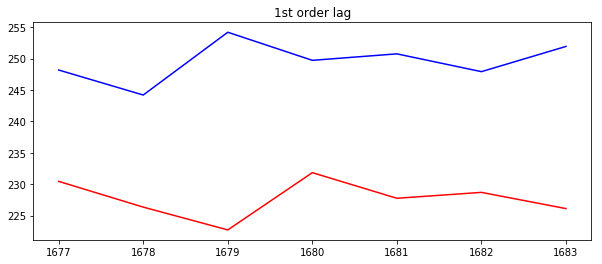

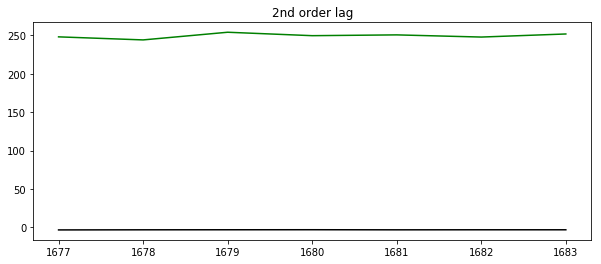

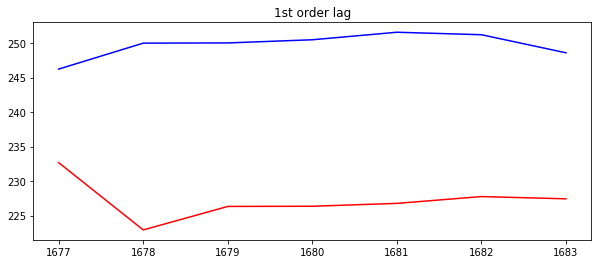

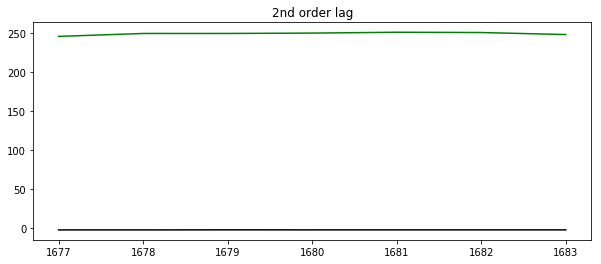

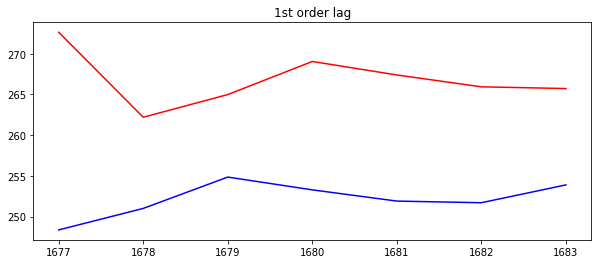

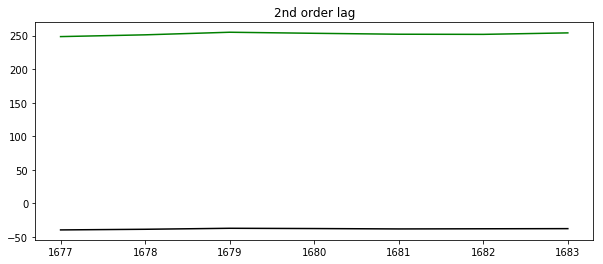

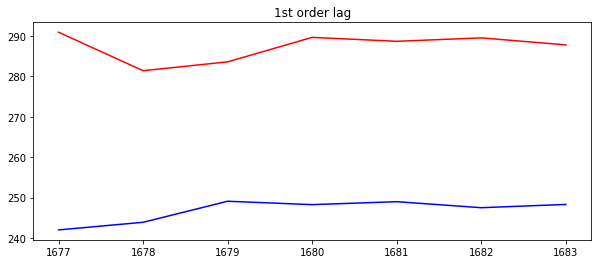

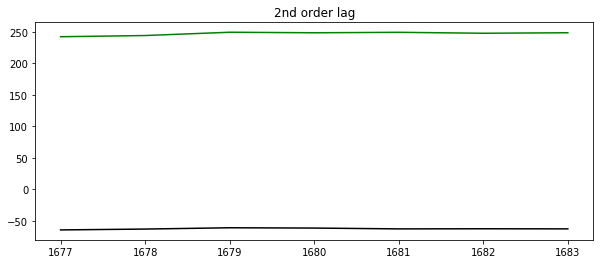

In [18]:
auto_regressive('Open')
auto_regressive('Close')
auto_regressive('High')
auto_regressive('Low')

# USING OPTIMAL FUNCTION

In [19]:
def forcast_plot_WMA(train,valid):
    
    plt.style.use("fivethirtyeight")
    
    train.set_index('Date')['Open'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    valid.set_index('Date')['Open_Weighted_MA'].plot(figsize=(12, 10), linewidth=2.5, color='Orange')
    plt.xlabel('Datetime')
    plt.ylabel('Opening Price')
    plt.legend(['Training','Validation'])
    plt.show()
    
    train.set_index('Date')['Close'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    valid.set_index('Date')['Close_Weighted_MA'].plot(figsize=(12, 10), linewidth=2.5, color='Orange')
    plt.xlabel('Datetime')
    plt.ylabel('Closing Price')
    plt.legend(['Training','Validation'])
    plt.show()
    
    train.set_index('Date')['High'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    valid.set_index('Date')['High_Weighted_MA'].plot(figsize=(12, 10), linewidth=2.5, color='Orange')
    plt.xlabel('Datetime')
    plt.ylabel('Highest Price')
    plt.legend(['Training','Validation'])
    plt.show()
    
    train.set_index('Date')['Low'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    valid.set_index('Date')['Low_Weighted_MA'].plot(figsize=(12, 10), linewidth=2.5, color='Orange')
    plt.xlabel('Datetime')
    plt.ylabel('Lowest Price')
    plt.legend(['Training','Validation'])
    plt.show()
    
    train.set_index('Date')['Volume'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    valid.set_index('Date')['Volume_Weighted_MA'].plot(figsize=(12, 10), linewidth=2.5, color='Orange')
    plt.xlabel('Datetime')
    plt.ylabel('Volume Price')
    plt.legend(['Training','Validation'])
    plt.show()
    

In [20]:
def optimum_func(data,k,weights):
    if (k != len(weights)):
        print("Error: Value of K is not equal to number of Weights or sum of weights equals 1")
    else:
        df = pd.DataFrame(data)
        #weights = np.array([0.5, 0.25, 0.25])
        sum_weights = np.sum(weights)
    
        data['Open_Weighted_MA'] = (data['Open'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['Close_Weighted_MA'] = (data['Close'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['High_Weighted_MA'] = (data['High'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['Low_Weighted_MA'] = (data['Low'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
    
        data['Volume_Weighted_MA'] = (data['Volume'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
        
        data['A_Close_Weighted_MA'] = (data['Adj_Close'].rolling(window=k, center=True).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False))
        
        train = data[(data.Date <= 'Mar 07 2017') & (data.Date >= 'Mar 01 2016')] 
        valid = data[(data.Date <= 'Mar 10 2017') & (data.Date >= 'Mar 08 2017')] 
    #plotting
    train = data[(data.Date <= 'Mar 10 2017') & (data.Date >= 'Mar 01 2016')] 
    valid = data[(data.Date <= 'Mar 10 2017') & (data.Date >= 'Mar 08 2017')] 
    forcast_plot_WMA(train,valid)

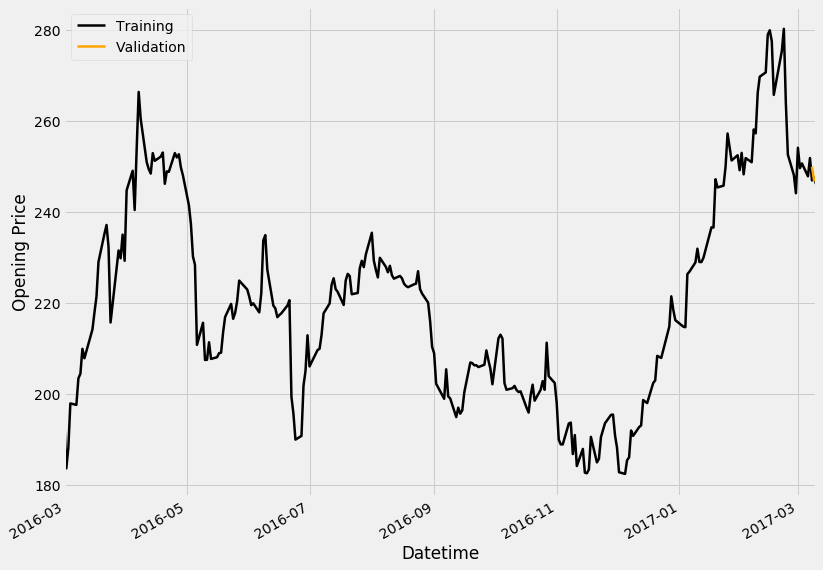

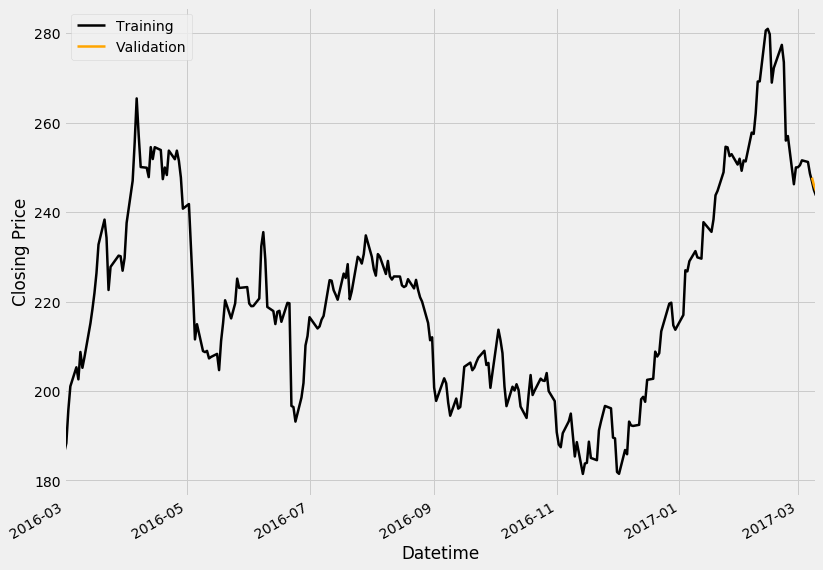

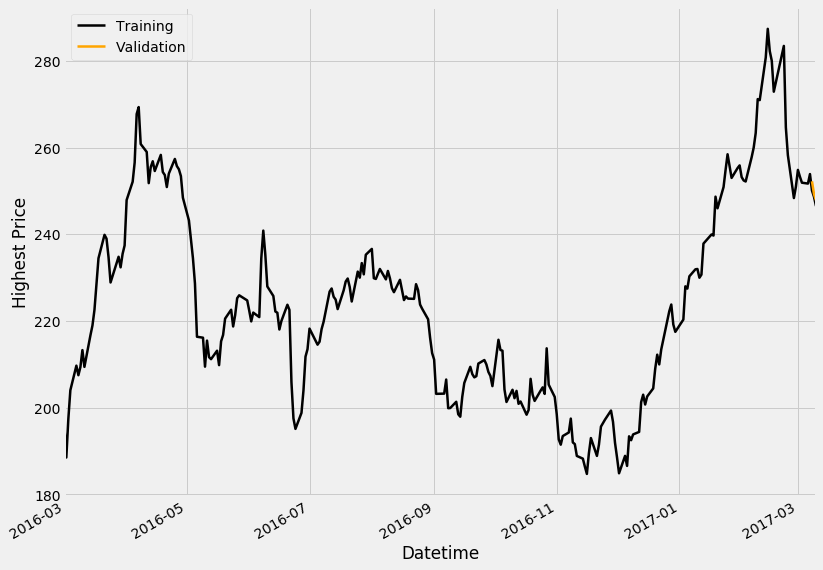

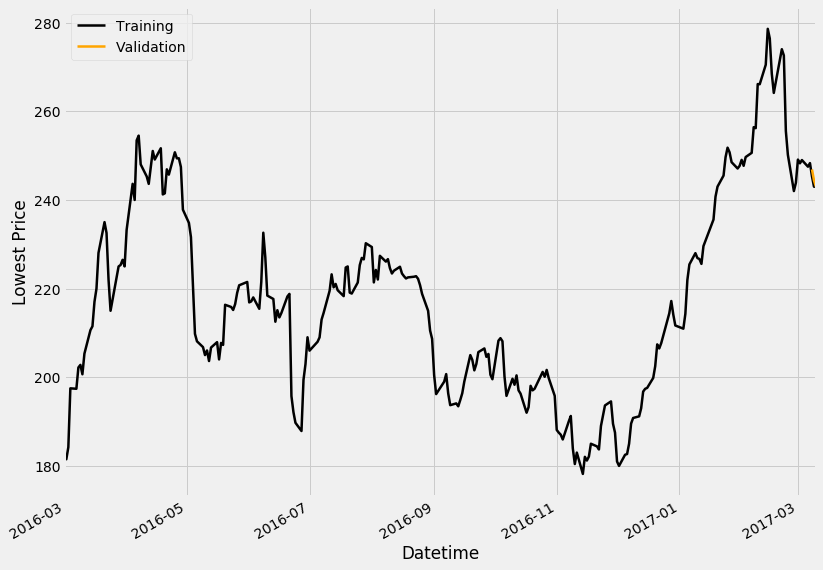

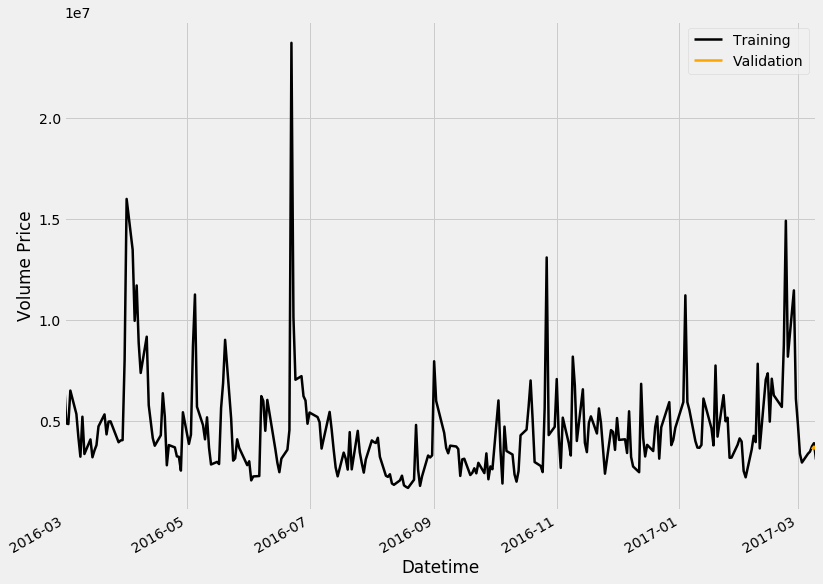

In [21]:
optimum_func(data,3,[0.6,0.3,0.1])

# DETERMINING TRENDS

In [22]:
def show_plot(data):
    p_dates.set_index('Date')['Open'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    plt.xlabel('Datetime')
    plt.ylabel('Opening Price')
    plt.show()
    
    p_dates.set_index('Date')['Close'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    plt.xlabel('Datetime')
    plt.ylabel('Closing Price')
    plt.show()
    
    p_dates.set_index('Date')['High'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    plt.xlabel('Datetime')
    plt.ylabel('High Price')
    plt.show()
    
    p_dates.set_index('Date')['Low'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    plt.xlabel('Datetime')
    plt.ylabel('Low Price')
    plt.show()
    
    p_dates.set_index('Date')['Volume'].plot(figsize=(12, 10), linewidth=2.5, color='Black')
    plt.xlabel('Datetime')
    plt.ylabel('Volume Price')
    plt.show()

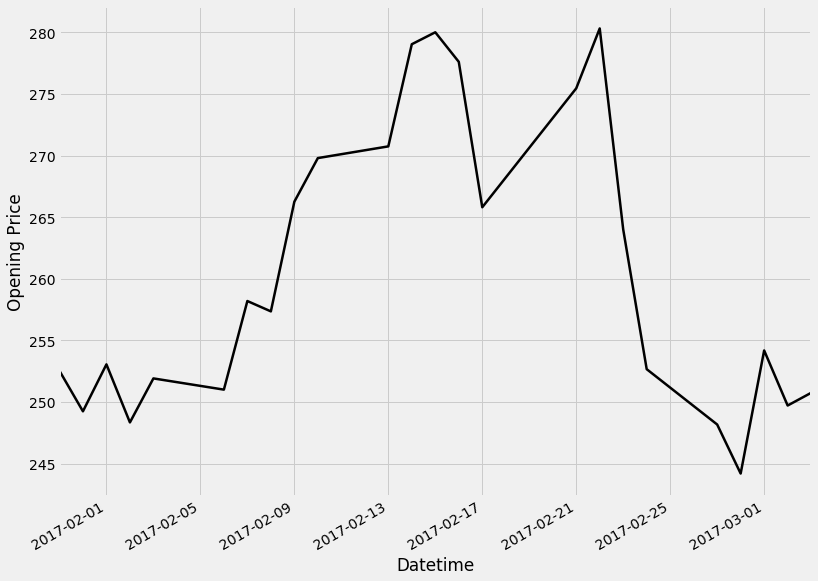

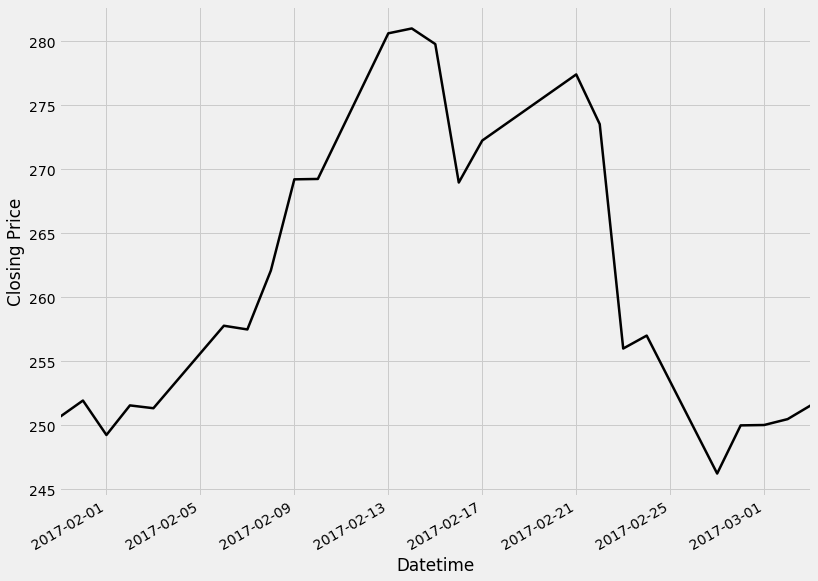

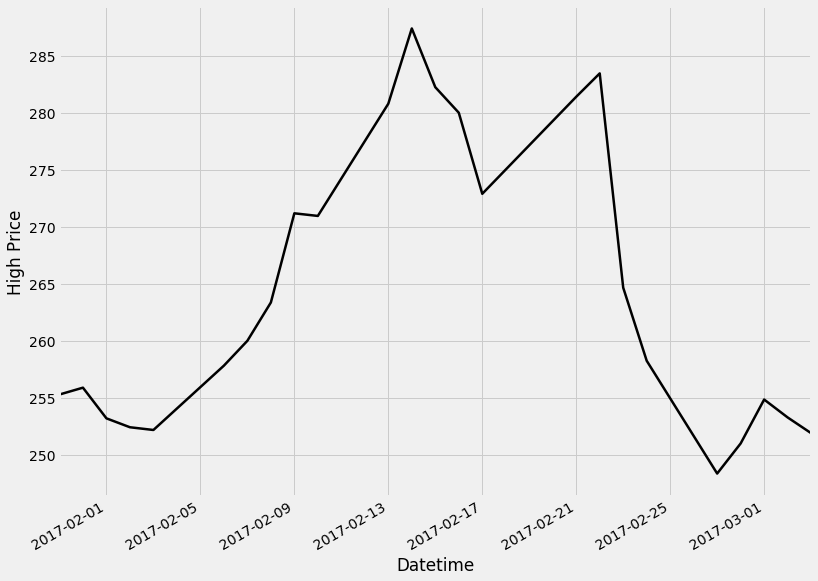

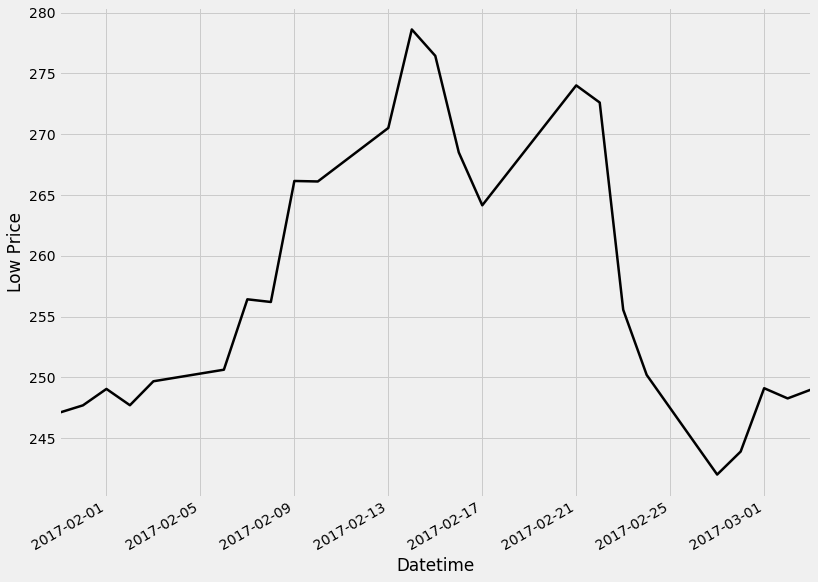

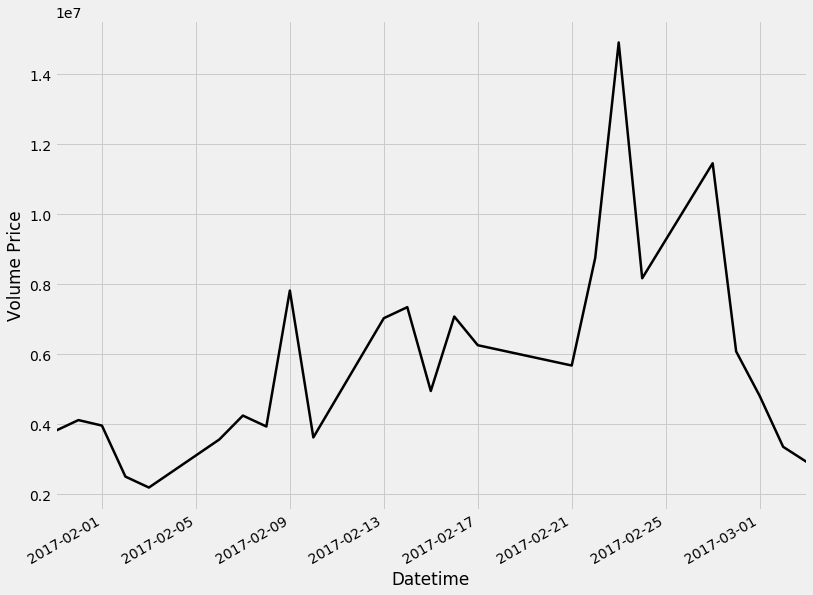

In [23]:
p_dates = data[(data.Date <= 'Mar 03 2017') & (data.Date >= 'Jan 30 2017')]
show_plot(p_dates)